In [34]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

df = pd.read_csv('ALL_output_17ii.csv')
df = df[df['code'].isin(['A','B','C','D-E','F','G','H','I','J','K','L','M-N','O-U','TOT'])]

df.head()

,country,var,code,_1970,_1971,_1972,_1973,_1974,_1975,_1976,...,_2006,_2007,_2008,_2009,_2010,_2011,_2012,_2013,_2014,_2015
0,AT,VA,TOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,237683.2,251926.6,260533.0,254762.6,262311.7,274852.3,281955.9,287194.6,294442.6,302653.1
2,AT,VA,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3494.2,4029.8,3946.8,3306.1,3761.9,4427.7,4330.3,4124.1,4033.7,3905.4
3,AT,VA,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1058.5,986.7,1345.3,1076.4,1179.3,1502.7,1515.9,1482.8,1452.6,1182.7
4,AT,VA,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47702.3,51524.0,51051.5,47034.5,48983.1,51580.7,53382.5,53554.3,54581.6,57220.9
16,AT,VA,D-E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7574.5,7710.9,7937.8,8097.6,7970.3,7874.8,8250.0,8501.6,8211.9,7959.8


In [74]:
data = df.groupby(['country','var','code']).mean().stack().reset_index().rename(columns={'level_3':'year',0:'value'})
data['year'] = data['year'].str[1:].astype(int)
data = pd.pivot_table(data,index=['country','year'],columns=['var','code'],values='value').loc['DE']

data.head()

var           CAP                                                          \
code            A            B              C           D-E             F   
year                                                                        
1995 -5669.902256  1721.745387  104664.714800  24786.435897  13335.273187   
1996 -2819.767396 -1949.762846  101258.029710  28659.790816   8138.395814   
1997 -1936.378049 -1776.864865  111821.442724  28076.452880   7002.976645   
1998 -2076.653768 -1375.068966  118419.052740  29399.005263   5298.719041   
1999 -2661.576132 -1157.770833  113283.504804  28762.400000   5310.022847   

var                                                                        \
code             G             H            I             J             K   
year                                                                        
1995  29268.683490  10524.533546 -3018.509804  28295.827636  20233.283296   
1996  26879.738499  10835.277361  -994.219709  28331.404490  25306.814433   
1997  27822.782851  16321.813307  -945.896166  33411.527996  27494.589669   
1998  35215.639027  16925.817757   -38.228637  39900.888126  22840.958455   
1999  26871.308931  18391.748830  -415.877128  38611.224213  35923.745327   

var   ...     VA_QI                                                           \
code  ...         F         G        H        I        J         K         L   
year  ...                                                                      
1995  ...  138811.7  180771.2  74427.3  38534.5  45554.5  138487.9  183540.5   
1996  ...  131553.1  178729.8  77306.9  37233.6  48293.1  139784.6  199604.0   
1997  ...  129007.1  181207.0  79064.8  37503.1  52633.6  141612.8  206179.0   
1998  ...  124933.6  188753.5  79021.7  38265.0  60436.2  143759.9  213021.4   
1999  ...  123985.0  188524.1  82257.2  37832.5  65138.4  155675.3  211417.7   

var                                          
code       M-N            O-U           TOT  
year                                         
1995  193592.3  433278.329989  1.900448e+06  
1996  197681.4  443107.665649  1.918890e+06  
1997  199479.7  449349.851015  1.958975e+06  
1998  207165.2  453643.600638  2.000659e+06  
1999  216501.2  460423.879713  2.036849e+06  

[5 rows x 560 columns]

Text(0.5, 1.0, 'Contributions to Gross Value Added Growth in France')

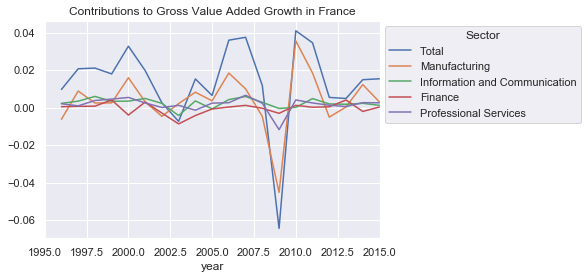

In [75]:
share = data['VA'].div(data.loc[:,('VA','TOT')],axis=0).rolling(2).mean()
growth = np.log(data['VA_QI']).diff()

contrib = share*growth
contrib['TOT'].plot(label='Total')
contrib['C'].plot(label='Manufacturing')
contrib['J'].plot(label='Information and Communication')
contrib['K'].plot(label='Finance')
contrib['M-N'].plot(label='Professional Services')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Sector')
plt.title('Contributions to Gross Value Added Growth in France')

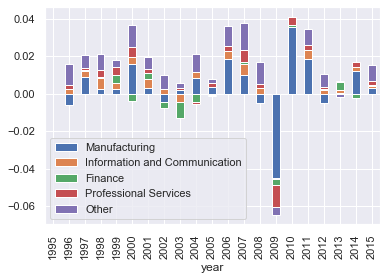

In [76]:
table = pd.DataFrame()

table['Total'] = contrib['TOT']
table['Manufacturing'] = contrib['C']
table['Information and Communication'] = contrib['J']
table['Finance'] = contrib['K']
table['Professional Services'] = contrib['M-N']
table['Other'] = table['Total'] - table[['Manufacturing','Information and Communication','Finance','Professional Services']].sum(axis=1)

sector = ['Manufacturing','Information and Communication','Finance','Professional Services','Other']
table[sector].plot.bar(stacked=True)

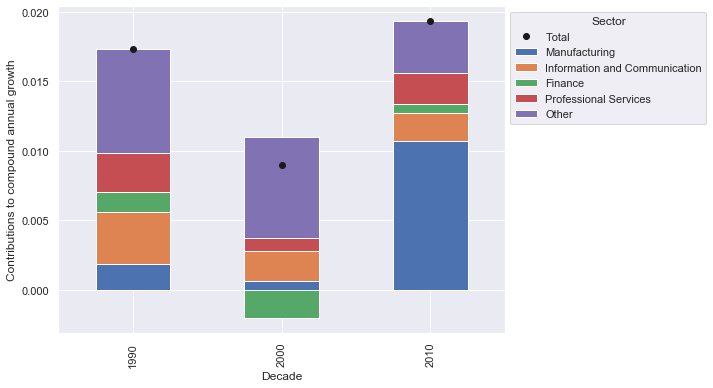

In [79]:
fig, ax = plt.subplots(figsize=(8,6))
table.groupby((table.index//10)*10).mean()[sector].plot.bar(stacked=True,ax=ax)
plt.plot(np.arange(0,3),table.groupby((table.index//10)*10).mean()['Total'],marker='o',linestyle='None',color='k',label='Total')
plt.xlabel('Decade')
#plt.xticks(np.arange(0,5),['{}s'.format(i) for i in np.arange(1970,2020,10)],rotation=0)
#plt.yticks(np.arange(0,0.04,0.005),['{}%'.format(i) for i in np.arange(0,4,0.5)])
plt.ylabel('Contributions to compound annual growth')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Sector')